In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score, mean_squared_error

In [4]:
# Load dataset
df = pd.read_csv('OnlineNewsPopularity.csv')
df.columns = [col.strip() for col in df.columns]  # Remove leading/trailing whitespace

In [5]:
print("Shape of dataset:", df.shape)
print("Sample rows:")
display(df.head())

Shape of dataset: (39644, 61)
Sample rows:


,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [6]:
# Drop irrelevant column
df.drop("url", axis=1, inplace=True)

In [7]:
display(df.head())

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [8]:
# Assigning target column
target_col = "shares"
print("\nTarget column summary:")
print(df[target_col].describe())


Target column summary:
count     39644.000000
mean       3395.380184
std       11626.950749
min           1.000000
25%         946.000000
50%        1400.000000
75%        2800.000000
max      843300.000000
Name: shares, dtype: float64


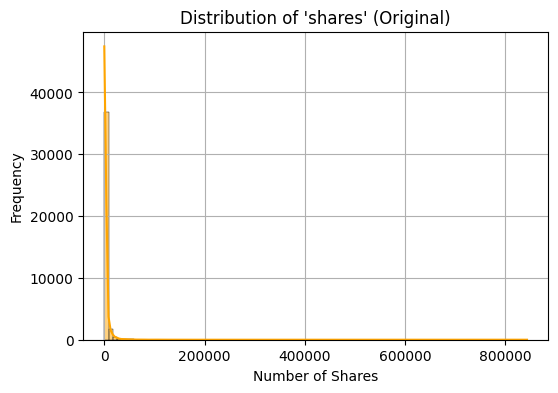

In [9]:
# Histogram of shares
plt.figure(figsize=(6, 4))
sns.histplot(df['shares'], bins=100, kde=True, color='orange')
plt.title("Distribution of 'shares' (Original)")
plt.xlabel("Number of Shares")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

# shares is highly skewed so we need to apply logarithmic transfomation to normalize it 

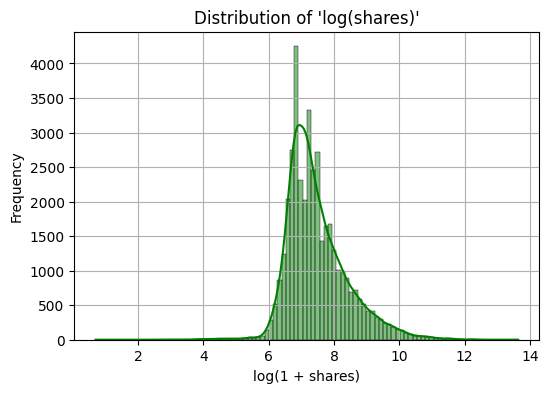

In [10]:
# Apply log(1 + x) to handle zero shares too
df['log_shares'] = np.log1p(df['shares'])

# Compare new distribution
plt.figure(figsize=(6, 4))
sns.histplot(df['log_shares'], bins=100, kde=True, color='green')
plt.title("Distribution of 'log(shares)'")
plt.xlabel("log(1 + shares)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

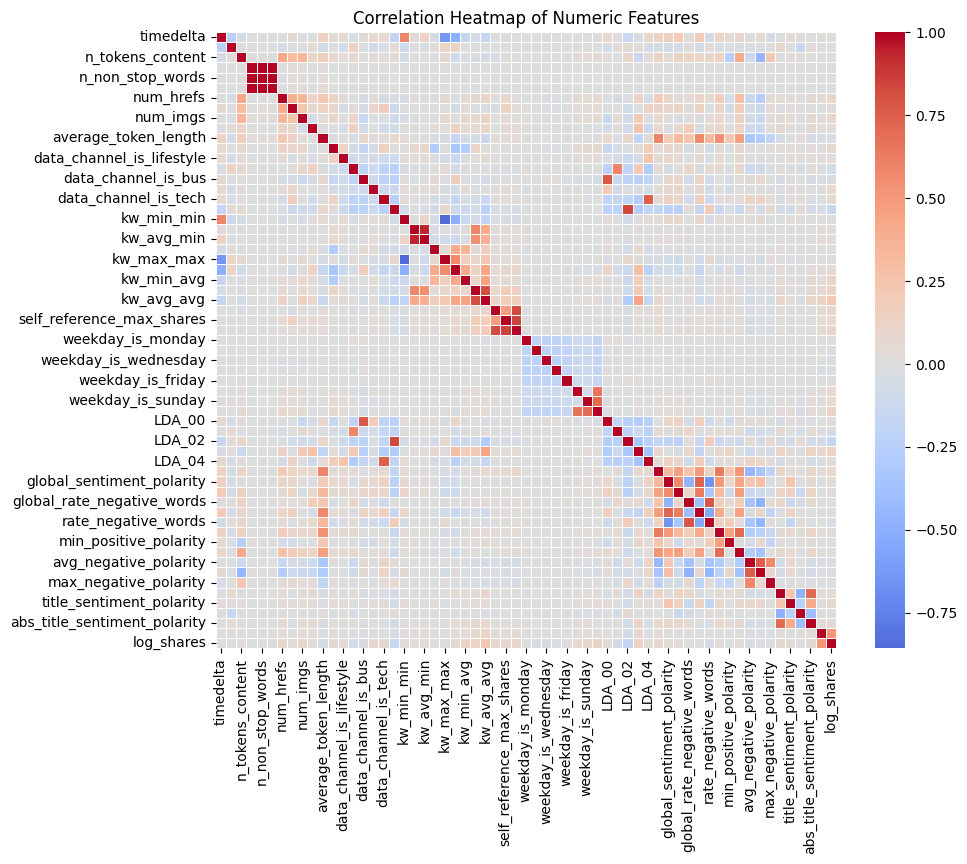

In [11]:
# Focus only on numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Compute the correlation matrix
corr_matrix = numeric_df.corr()

# Plot full heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', center=0, linewidths=0.5)
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

In [12]:
# Correlation of all features with log_shares
target_corr = corr_matrix['log_shares'].sort_values(ascending=False)
print("Top correlations with log_shares:\n")
print(target_corr.head(10))  # Top positive
print("\nLowest (most negative) correlations:\n")
print(target_corr.tail(10))  # Top negative

# high positive values of correlation means as feature value increases, target value also increases
# low negative values of correlation means as feature value decreases, target value also decrease

Top correlations with log_shares:

log_shares                    1.000000
shares                        0.510181
kw_avg_avg                    0.221822
LDA_03                        0.126037
is_weekend                    0.114391
kw_max_avg                    0.109343
kw_min_avg                    0.108850
num_hrefs                     0.105142
num_imgs                      0.091519
self_reference_avg_sharess    0.087238
Name: log_shares, dtype: float64

Lowest (most negative) correlations:

data_channel_is_bus             -0.030587
weekday_is_tuesday              -0.031095
avg_negative_polarity           -0.034323
weekday_is_wednesday            -0.036609
average_token_length            -0.045321
rate_negative_words             -0.048176
LDA_01                          -0.052992
data_channel_is_entertainment   -0.082531
data_channel_is_world           -0.151685
LDA_02                          -0.165076
Name: log_shares, dtype: float64


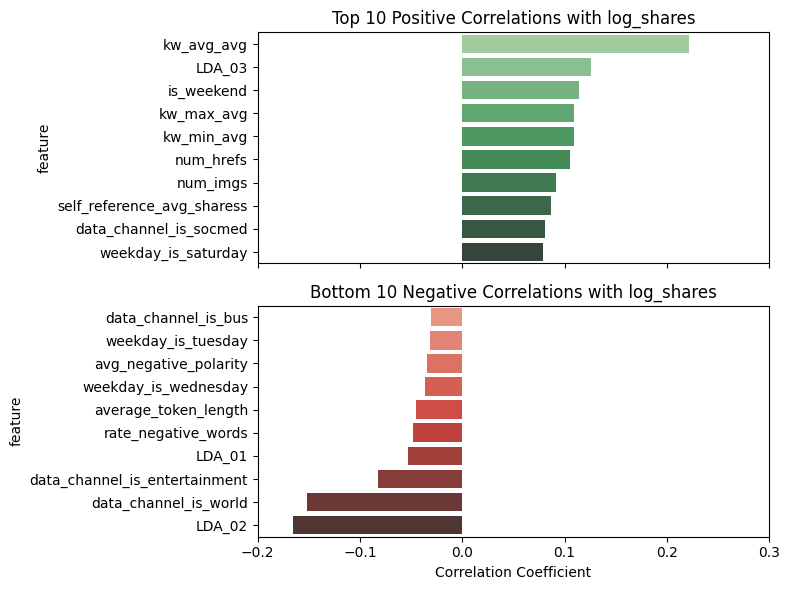

In [13]:
# Drop the target and dependent variable from top correlations
top_corr = target_corr.drop(['log_shares', 'shares']).head(10)
bottom_corr = target_corr.tail(10)

fig, ax = plt.subplots(2, 1, figsize=(8, 6), sharex=True)

# Convert to DataFrame for hue assignment
top_df = top_corr.reset_index()
top_df.columns = ['feature', 'correlation']

bottom_df = bottom_corr.reset_index()
bottom_df.columns = ['feature', 'correlation']

# Plot top correlations
sns.barplot(
    data=top_df, x='correlation', y='feature', hue='feature',
    palette='Greens_d', ax=ax[0], legend=False
)
ax[0].set_title('Top 10 Positive Correlations with log_shares')
ax[0].set_xlim(-0.2, 0.3)

# Plot bottom correlations
sns.barplot(
    data=bottom_df, x='correlation', y='feature', hue='feature',
    palette='Reds_d', ax=ax[1], legend=False
)
ax[1].set_title('Bottom 10 Negative Correlations with log_shares')
ax[1].set_xlabel('Correlation Coefficient')

plt.tight_layout()
plt.show()


In [14]:
# Drop non-predictive columns
df_cleaned = df.drop(columns=['shares'])
#drop shares column as we have log(shares) as target col

In [15]:
# Features and target
X = df_cleaned.drop(columns=['log_shares'])  # input features, dropping log_shares as it is target and not required in input features
y = df_cleaned['log_shares']                # target variable

In [16]:
# splitting train test dataset in 80 - 20 ratio
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [17]:
# normalizing the values of numeric features as part of feature scaling so they fall in similar range
# as part of standard scaler we are normalizing all features such that mean of each feature is 0 and standard deviation of each feature is 1

scaler = StandardScaler()

# Fit only on training data
X_train_scaled = scaler.fit_transform(X_train)

# Use the same transformation on test data
X_test_scaled = scaler.transform(X_test)

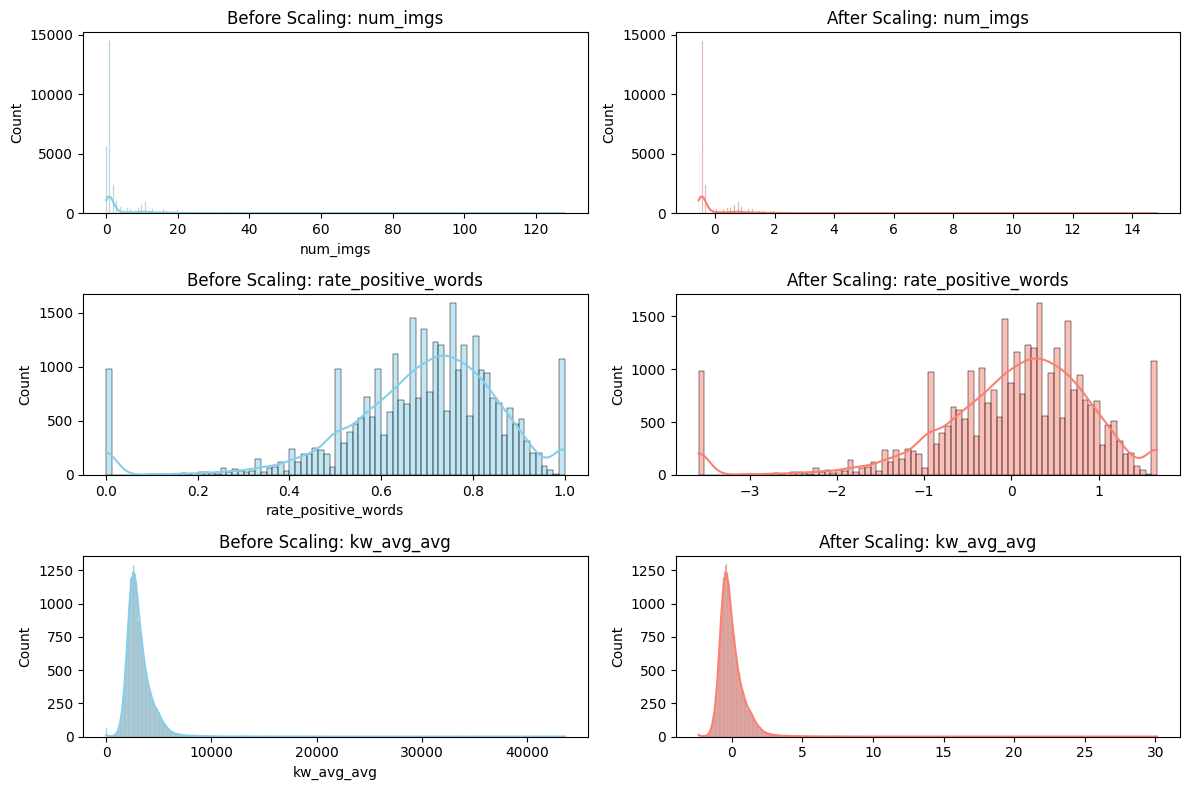

In [18]:
# visualization of before and after the feature scaling ()
# Pick some features to visualize
features_to_plot = ['num_imgs', 'rate_positive_words', 'kw_avg_avg']

fig, axes = plt.subplots(len(features_to_plot), 2, figsize=(12, 8))

for i, feature in enumerate(features_to_plot):
    # Before scaling (using the original X_train)
    sns.histplot(X_train[feature], kde=True, ax=axes[i, 0], color='skyblue')
    axes[i, 0].set_title(f'Before Scaling: {feature}')
    
    # After scaling (X_train_scaled is a numpy array, so convert to DataFrame temporarily)
    sns.histplot(
        pd.Series(X_train_scaled[:, X_train.columns.get_loc(feature)]), 
        kde=True, ax=axes[i, 1], color='salmon'
    )
    axes[i, 1].set_title(f'After Scaling: {feature}')

plt.tight_layout()
plt.show()


In [19]:
# Initialize linear regression model
lr_model = LinearRegression()

# Fit model on training data
lr_model.fit(X_train_scaled, y_train)

LinearRegression()

In [20]:
# Predict log_shares for test set
y_pred = lr_model.predict(X_test_scaled)

In [21]:
# model evaluation 
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R² score: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")

R² score: 0.1272
RMSE: 0.8649


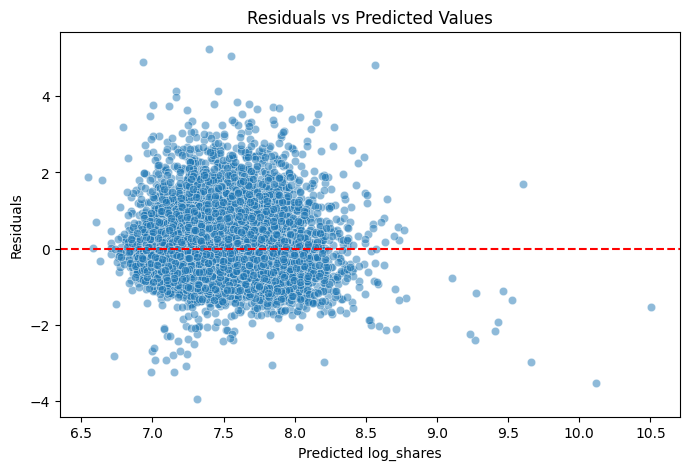

In [22]:
residuals = y_test - y_pred

plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted log_shares')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()

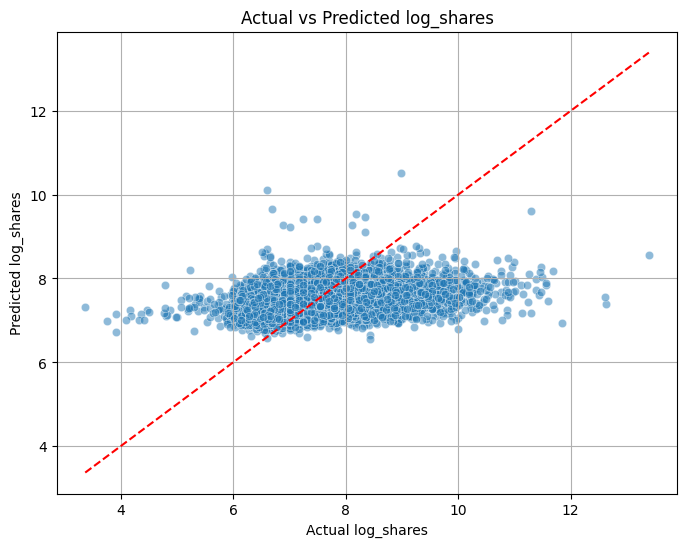

In [23]:
#visualization of actual vs predicted

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Perfect prediction line
plt.xlabel("Actual log_shares")
plt.ylabel("Predicted log_shares")
plt.title("Actual vs Predicted log_shares")
plt.grid(True)
plt.show()

In [ ]:
# Above plot shows that model is biased towards mean (7.5 - 8.5) and struggles to predict higher and lower values
# In this case the linear regression results in underfitting. this could be due to non linearity of data.

In [25]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler
import numpy as np

models = {
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'KNN': KNeighborsRegressor(),
    'SVR': SVR(),
    'MLP': MLPRegressor(max_iter=500)
}

results = {}

for name, model in models.items():
    pipe = make_pipeline(StandardScaler(), model)
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    
    results[name] = {
        'R2': r2_score(y_test, y_pred),
        'MAE': mean_absolute_error(y_test, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred))
    }

# Convert to DataFrame for easy viewing
# import pandas as pd
results_df = pd.DataFrame(results).T.sort_values(by='R2', ascending=False)
print(results_df)


                         R2       MAE      RMSE
Gradient Boosting  0.172001  0.627091  0.842476
Random Forest      0.164330  0.635261  0.846370
Ridge              0.127278  0.644153  0.864929
SVR                0.125547  0.617134  0.865787
MLP                0.083373  0.654624  0.886418
Lasso             -0.000112  0.707744  0.925906
KNN               -0.011384  0.689147  0.931109
Decision Tree     -0.765092  0.902605  1.230060


In [28]:
gb_model = GradientBoostingRegressor().fit(X_train, y_train)
rf_model = RandomForestRegressor().fit(X_train, y_train)
ridge_model = Ridge().fit(X_train, y_train)
svr_model = SVR().fit(X_train, y_train)
mlp_model = MLPRegressor().fit(X_train, y_train)
lasso_model = Lasso().fit(X_train, y_train)
knn_model = KNeighborsRegressor().fit(X_train, y_train)
dt_model = DecisionTreeRegressor().fit(X_train, y_train)

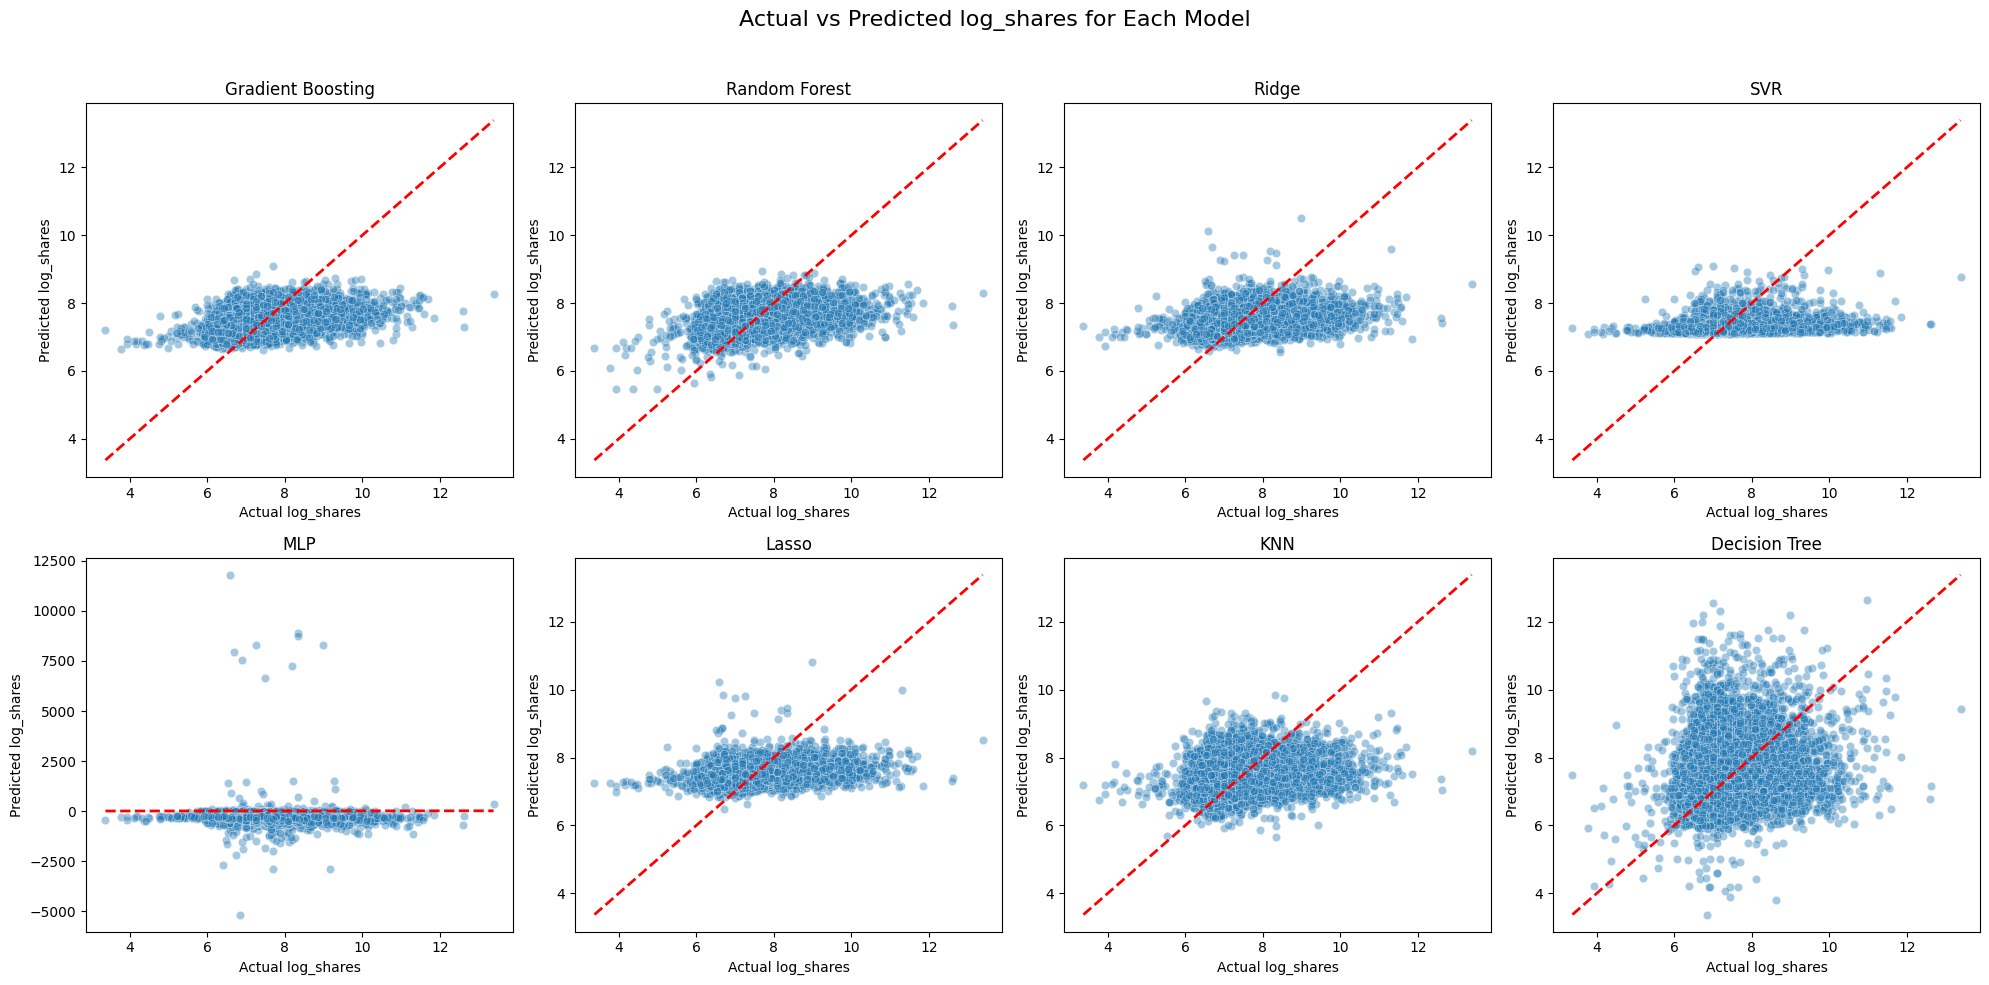

In [29]:
# Models dictionary: replace these with your actual trained model instances
models = {
    'Gradient Boosting': gb_model,
    'Random Forest': rf_model,
    'Ridge': ridge_model,
    'SVR': svr_model,
    'MLP': mlp_model,
    'Lasso': lasso_model,
    'KNN': knn_model,
    'Decision Tree': dt_model
}

# Plot settings
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()

# Generate plots
for i, (name, model) in enumerate(models.items()):
    y_pred = model.predict(X_test)
    sns.scatterplot(x=y_test, y=y_pred, ax=axes[i], alpha=0.4)
    axes[i].plot([y_test.min(), y_test.max()],
                 [y_test.min(), y_test.max()],
                 'r--', linewidth=2)  # Diagonal line
    axes[i].set_title(f'{name}')
    axes[i].set_xlabel('Actual log_shares')
    axes[i].set_ylabel('Predicted log_shares')

plt.suptitle("Actual vs Predicted log_shares for Each Model", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


In [40]:
def train_with_sqrt_target(X, y_shares, models_dict):
    # Apply square root transformation to the target variable
    y_sqrt = np.sqrt(y_shares)
    
    # Split the data
    X_train, X_test, y_train_sqrt, y_test_sqrt = train_test_split(X, y_sqrt, test_size=0.2, random_state=42)
    
    # Dictionary to store results
    results_sqrt = {}
    
    # Train and evaluate each model
    for name, model in models_dict.items():
        model.fit(X_train, y_train_sqrt)
        y_pred_sqrt = model.predict(X_test)
        
        # Calculate RMSE
        rmse = np.sqrt(mean_squared_error(y_test_sqrt, y_pred_sqrt))
        results_sqrt[name] = rmse
        
        # Generate and display scatter plot
        plt.figure(figsize=(6, 5))
        plt.scatter(y_test_sqrt, y_pred_sqrt, alpha=0.5, color='blue')
        plt.plot([y_test_sqrt.min(), y_test_sqrt.max()], [y_test_sqrt.min(), y_test_sqrt.max()], 'r--', lw=2)
        plt.xlabel('Actual sqrt(shares)')
        plt.ylabel('Predicted sqrt(shares)')
        plt.title(f'Actual vs Predicted sqrt(shares) for {name}')
        plt.tight_layout()
        plt.show()  # Ensure the plot is displayed
    
    return results_sqrt

# Example usage (replace with your actual variables)
# results_sqrt = train_with_sqrt_target(X, df['shares'], models_dict)

In [44]:
# Create a new column using sqrt transformation
df['sqrt_shares'] = np.sqrt(df['shares'])

# Update the cleaned version if needed
# df_cleaned['sqrt_shares'] = np.sqrt(df_cleaned['shares'])

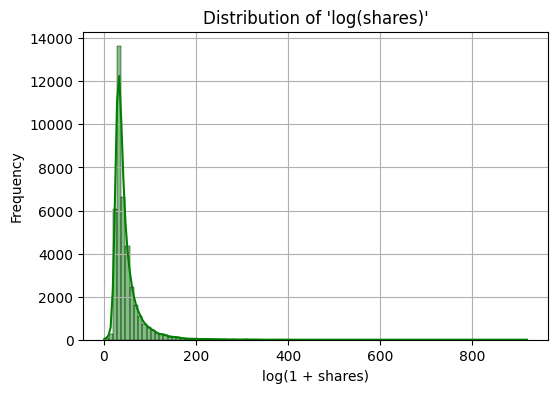

In [ ]:
# df_cleaned['shares'].head()

df_cleaned['shares'] = df.loc[df_cleaned.index, 'shares']
df_cleaned['sqrt_shares'] = np.sqrt(df_cleaned['shares'])

# print(df_cleaned['shares'].head())
# print(df_cleaned['sqrt_shares'].head())

# Compare new distribution with sqrt function
plt.figure(figsize=(6, 4))
sns.histplot(df_cleaned['sqrt_shares'], bins=100, kde=True, color='green')
plt.title("Distribution of 'log(shares)'")
plt.xlabel("log(1 + shares)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


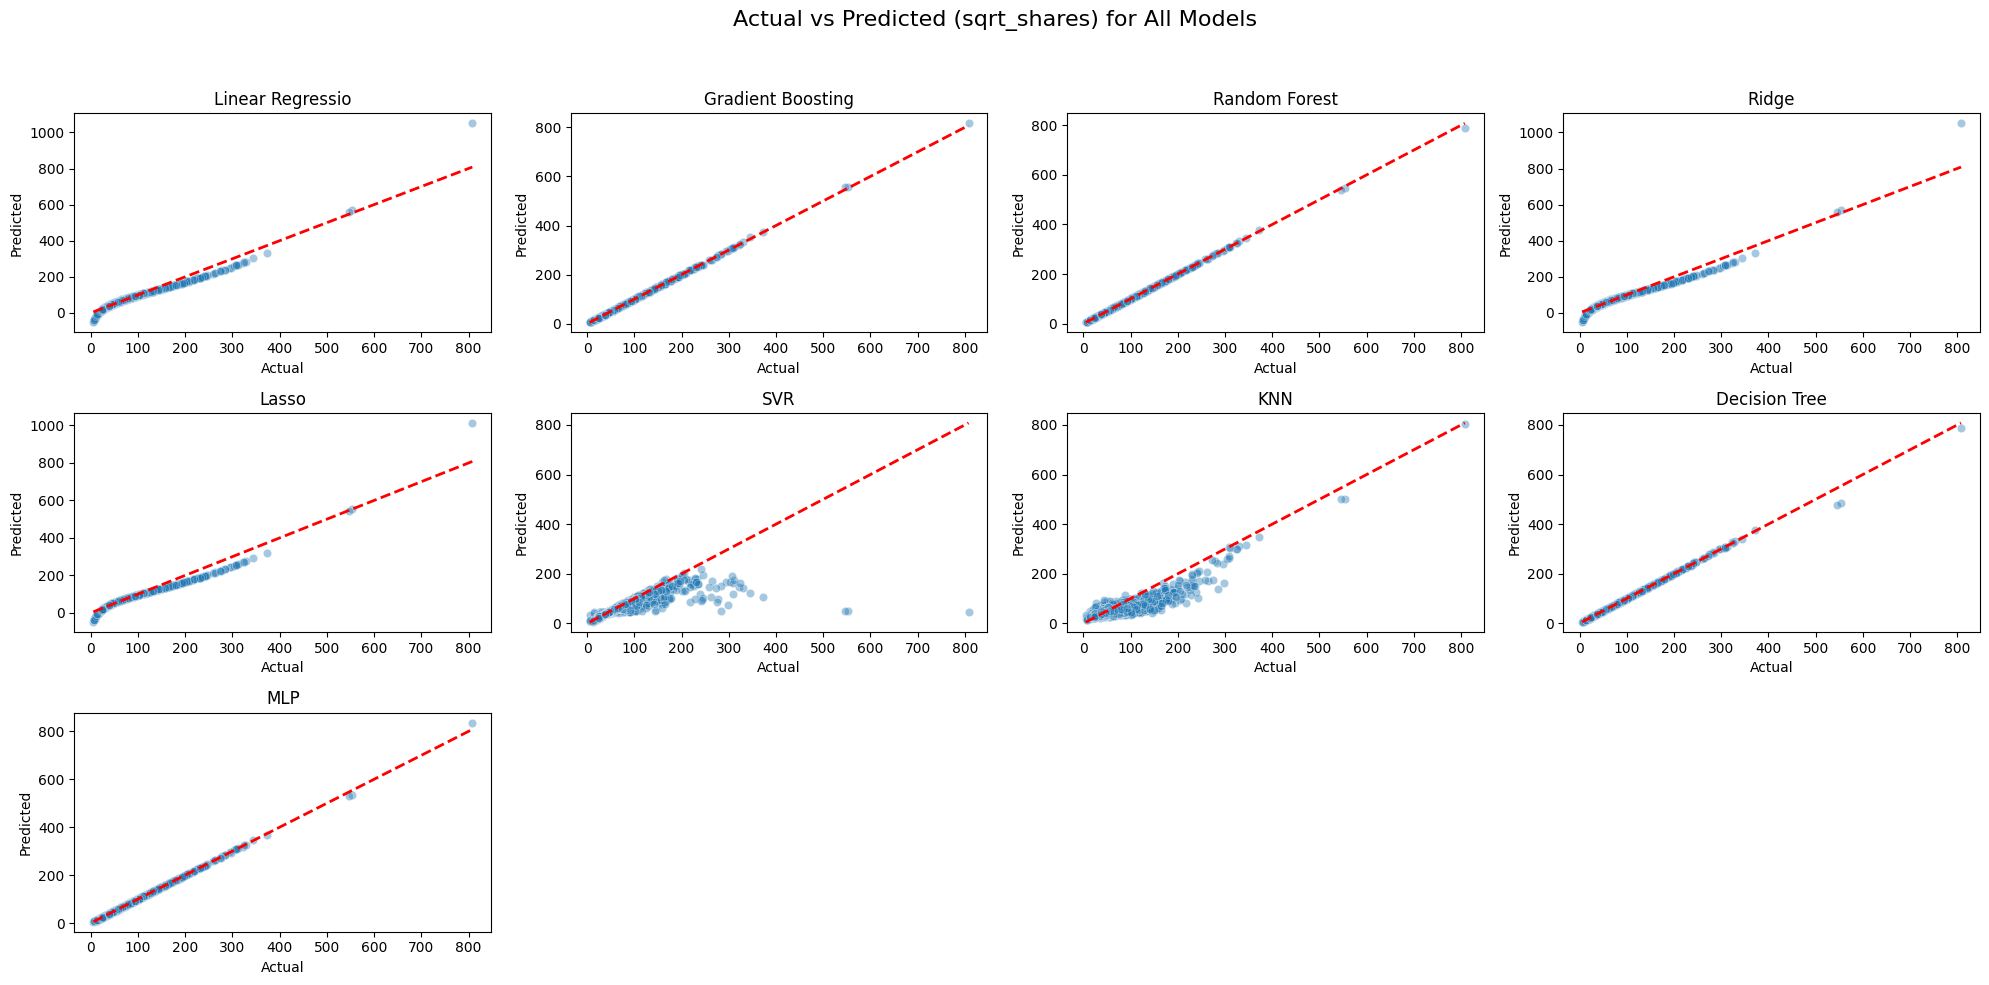

In [60]:
# 1. Target: Choose either 'log_shares' or 'sqrt_shares'
TARGET = 'sqrt_shares' 

# 2. Split Features and Target
X = df_cleaned.drop(columns=[TARGET])
y = df_cleaned[TARGET]

# 3. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 5. Define models
models = {
    'Linear Regressio': LinearRegression(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'SVR': SVR(),
    'KNN': KNeighborsRegressor(),
    'Decision Tree': DecisionTreeRegressor(),
    'MLP': MLPRegressor(max_iter=1000)
}

results_sqrt = {}

# 6. Train and predict
predictions = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    predictions[name] = y_pred

    results_sqrt[name] = {
        'R2': r2_score(y_test, y_pred),
        'MAE': mean_absolute_error(y_test, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred))
    }

results_sqrt_df = pd.DataFrame(results_sqrt).T.sort_values(by='R2', ascending=False)

    

# 7. Plot Actual vs Predicted
n_models = len(models)
n_cols = 4
n_rows = int(np.ceil(n_models / n_cols))

plt.figure(figsize=(20, 10))
for idx, (name, y_pred) in enumerate(predictions.items()):
    plt.subplot(n_rows, n_cols, idx + 1)
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.4)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(name)

plt.suptitle(f"Actual vs Predicted ({TARGET}) for All Models", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


In [57]:
#Above plots shows that sqrt transformation performs better with different models as compared to log transformation
# Ridge, SVR and KNN are still showing some data points deviating from ideal red line which can be handled by hyper tuning.

In [ ]:
print(results_df)
print(results_sqrt_df)

                         R2       MAE      RMSE
Gradient Boosting  0.172001  0.627091  0.842476
Random Forest      0.164330  0.635261  0.846370
Ridge              0.127278  0.644153  0.864929
SVR                0.125547  0.617134  0.865787
MLP                0.083373  0.654624  0.886418
Lasso             -0.000112  0.707744  0.925906
KNN               -0.011384  0.689147  0.931109
Decision Tree     -0.765092  0.902605  1.230060
                         R2        MAE       RMSE
Random Forest      0.999936   0.009943   0.260050
Gradient Boosting  0.999867   0.145170   0.375588
MLP                0.999707   0.246436   0.557670
Decision Tree      0.998761   0.033191   1.147428
Ridge              0.960625   3.732609   6.468788
Linear Regressio   0.960624   3.732688   6.468857
Lasso              0.958046   3.759468   6.677251
SVR                0.728411   3.663423  16.989024
KNN                0.699349  11.209522  17.874926
